# Assignment 3
## Machine Learning Workshop
In this assignment, we will work on image classification using TensorFlow.
* Download the [intel image dataset from Kaggle].
* We will use the [OpenCV image feature extraction library].

[intel image dataset from Kaggle]: https://www.kaggle.com/puneet6060/intel-image-classification
[OpenCV image feature extraction library]: https://docs.opencv.org/4.4.0/index.html

1\. [20 pts] Download the dataset, unzip and explore the file folders. Load the image dataset
with training and testing grouped. Display a few images. How many image channels are there?

In [22]:
import cv2
import os

In [16]:
labels = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
CNAMES = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [46]:
IMGSIZE = (128, 128)
X_tr, y_tr, X_ts, y_ts = [], [], [], []
for label in labels:
    #Train
    path = '../datasets/a3/seg_train/seg_train/' + label
    for f in sorted([_ for _ in os.listdir(path) if _.lower().endswith('.jpg')]):
        X_tr += [cv2.normalize(cv2.resize(cv2.imread(os.path.join(path,f)), IMGSIZE), None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)]
        y_tr += [CNAMES.index(label)]
    #Test
    path = '../datasets/a3/seg_test/seg_test/' + label
    for f in sorted([_ for _ in os.listdir(path) if _.lower().endswith('.jpg')]):
        X_ts += [cv2.normalize(cv2.resize(cv2.imread(os.path.join(path,f)), IMGSIZE), None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)]
        y_ts += [CNAMES.index(label)]

In [47]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Populating the interactive namespace from numpy and matplotlib


(150, 150, 3)


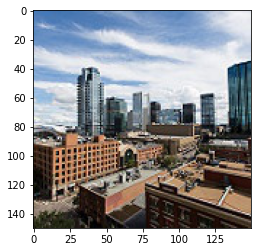

In [48]:
img = mpimg.imread('../datasets/a3/seg_train/seg_train/buildings/10006.jpg')
imgplot = plt.imshow(img)
print(img.shape)
plt.show()

(150, 150, 3)


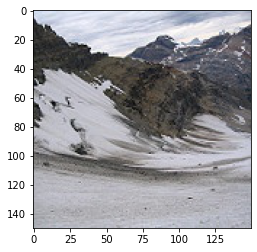

In [49]:
img = mpimg.imread('../datasets/a3/seg_train/seg_train/glacier/10055.jpg')
imgplot = plt.imshow(img)
print(img.shape)
plt.show()

In [53]:
cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

array([[[0.7960785 , 0.83921576, 0.909804  ],
        [0.83921576, 0.882353  , 0.9607844 ],
        [0.82745105, 0.87843144, 0.95294124],
        ...,
        [0.67058825, 0.7254902 , 0.77647066],
        [0.65882355, 0.70980394, 0.7725491 ],
        [0.63529414, 0.69803923, 0.7568628 ]],

       [[0.8235295 , 0.86666673, 0.93725497],
        [0.8313726 , 0.8745099 , 0.9450981 ],
        [0.8352942 , 0.87843144, 0.9490197 ],
        ...,
        [0.6509804 , 0.6784314 , 0.7490196 ],
        [0.6313726 , 0.65882355, 0.73333335],
        [0.61960787, 0.64705884, 0.72156864]],

       [[0.82745105, 0.8745099 , 0.93725497],
        [0.79215693, 0.83921576, 0.90196085],
        [0.8000001 , 0.8431373 , 0.91372555],
        ...,
        [0.72156864, 0.7254902 , 0.80392164],
        [0.72156864, 0.7254902 , 0.80392164],
        [0.7254902 , 0.7294118 , 0.8078432 ]],

       ...,

       [[0.64705884, 0.6745098 , 0.69803923],
        [0.67058825, 0.6901961 , 0.7137255 ],
        [0.65882355, 0

2\. [20 pts] Convert the imageset to numpy array, such as the array size is (14034, 128, 128, 3). Scale the imageset to [0-1].

In [54]:
np.shape(X_tr)

(14034, 128, 128, 3)

In [55]:
X_tr[0]

array([[[0.9607844 , 0.9686275 , 0.9686275 ],
        [0.9607844 , 0.9686275 , 0.9686275 ],
        [0.96470594, 0.9725491 , 0.9725491 ],
        ...,
        [0.9725491 , 0.9725491 , 0.9725491 ],
        [0.96470594, 0.9686275 , 0.9686275 ],
        [0.9607844 , 0.9686275 , 0.9686275 ]],

       [[0.9568628 , 0.96470594, 0.96470594],
        [0.9607844 , 0.9686275 , 0.9686275 ],
        [0.9607844 , 0.9686275 , 0.9686275 ],
        ...,
        [0.9725491 , 0.9725491 , 0.9725491 ],
        [0.96470594, 0.9686275 , 0.9686275 ],
        [0.9607844 , 0.9686275 , 0.9686275 ]],

       [[0.9568628 , 0.96470594, 0.96470594],
        [0.9568628 , 0.96470594, 0.96470594],
        [0.9607844 , 0.9686275 , 0.9686275 ],
        ...,
        [0.9725491 , 0.9725491 , 0.9725491 ],
        [0.96470594, 0.9686275 , 0.9686275 ],
        [0.9607844 , 0.9686275 , 0.9686275 ]],

       ...,

       [[0.18431373, 0.19215688, 0.19607845],
        [0.21568629, 0.22352943, 0.227451  ],
        [0.25490198, 0

3\. [40 pts] Create a convolutional neural network to train and report its performance on the testing portion of the dataset. 95% reclassification and 75% testing accuracy should be easily achievable without any hyperparameter tuning. (Hint: My model, which is similar to the model in module notebook, took around 10 minutes to train 10 epochs.)

4\. . [20 pts] Add regularization and/or drop-out features to your CNN. Report your model's best
performance.